# Canny Edge Detection

Multi-stage algorithm publish in 1986 by John Canny

1. Apply a Gaussian filter to smooth the image and remove as much noise as possible
2. Find the intesity gradients of the image
3. Aply non-maximum suppression to get rid of spurious response to edge detection.
4. Apply double threshold to determine potential edges
5.Track edge by hysterisis: Finalize all the edges by suppressing all the weaker edges not connected to the strong edges.

`*` for high resolution images where you only want general edges it is usually good practice to apply a custom blur before applying the Canny algorithm.

`*` The Canny algorithm requires the user to decide on low and high threhold values. 

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Convenience functions 

def show(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

def show_as_grayscale(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')


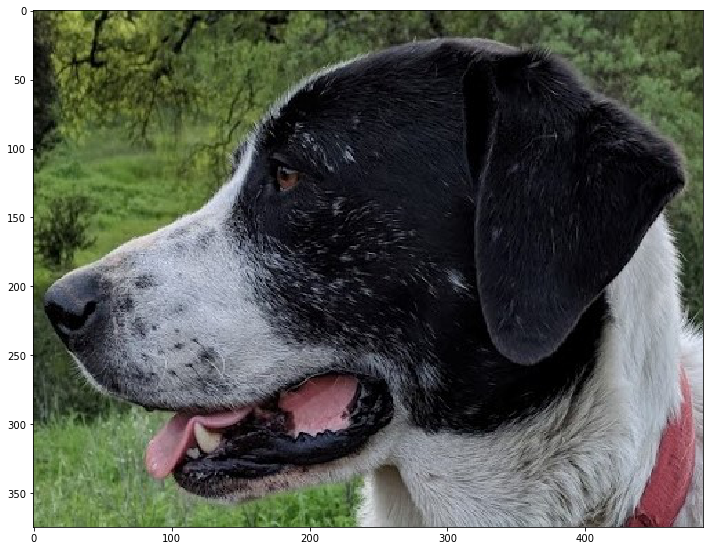

In [39]:
img = cv2.imread('DATA/sammy_face.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img)

### Non scientific, naked eye approach 

There is an element of experimentation to the threshold parameters with this algorithm. Initially the idea is to set them to the median value of a pexels possibilities, ie. 127 (0-255) but the results are visually stronger by ramping up both thresholds to 60%+  in thsi case at 160 per channel we're at 62%

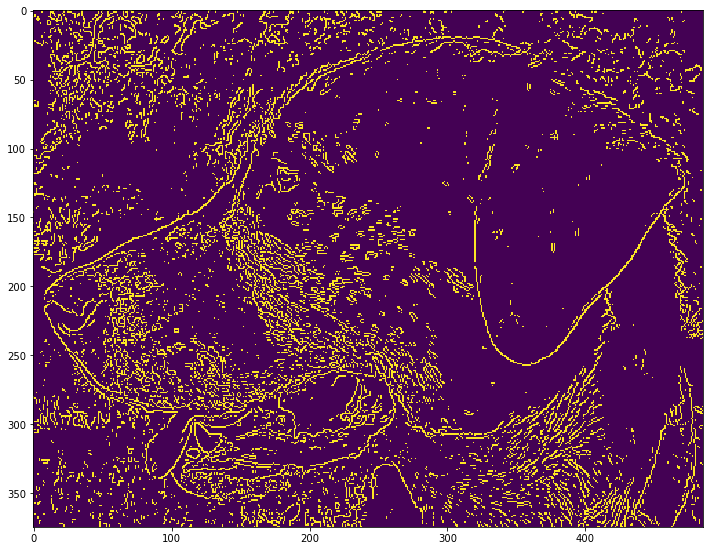

In [40]:
# ramped up params from the median 127 50% to 160 62%
edge = cv2.Canny(image=img, threshold1=160, threshold2=160)
show(edge)

In [19]:
# taking a more scientific approach we will begin by calculting the median pixel 
# range in the image. 

med_val = np.median(img)
med_val

# set the lower bound to zero or 70% of the median value whichever is greater
lower = int(max(0,0.7*med_val))

# set theupper threshold in the opposite direction. It's set to 130% of the 
# median, or the max of 255. Whichever is smaller. 
upper = int(min(255,1.3*med_val))

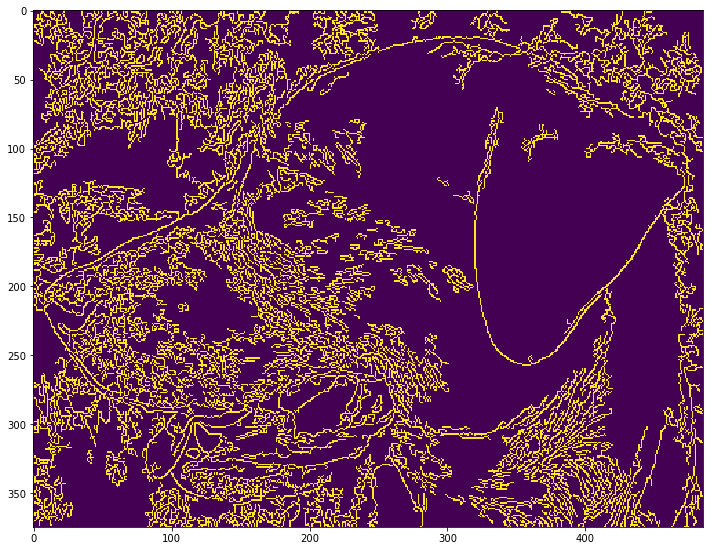

In [41]:
edge = cv2.Canny(image=img, threshold1=lower, threshold2=upper+200)
show(edge)

# Blurring before edge detection 

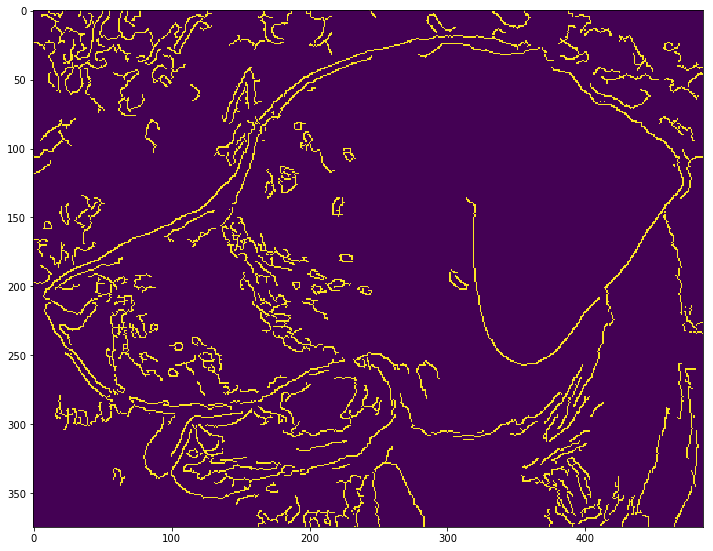

In [52]:
# create the blurred image with an off the shelf blur
blurred = cv2.blur(img, ksize=(5,5))

# recreate the edge image. 
edge = cv2.Canny(image=blurred, threshold1=lower, threshold2=upper+40)
show(edge)